In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import cv2 
from PIL import Image 
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from time import time
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import load
from sklearn.preprocessing import MinMaxScaler
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [0]:
x_train = load('gdrive/My Drive/MiniProj1/Train_data.npy')
y_train = load('gdrive/My Drive/MiniProj1/Train_label.npy')

x_test = load('gdrive/My Drive/MiniProj1/test_data.npy')
y_test = load('gdrive/My Drive/MiniProj1/test_label.npy')

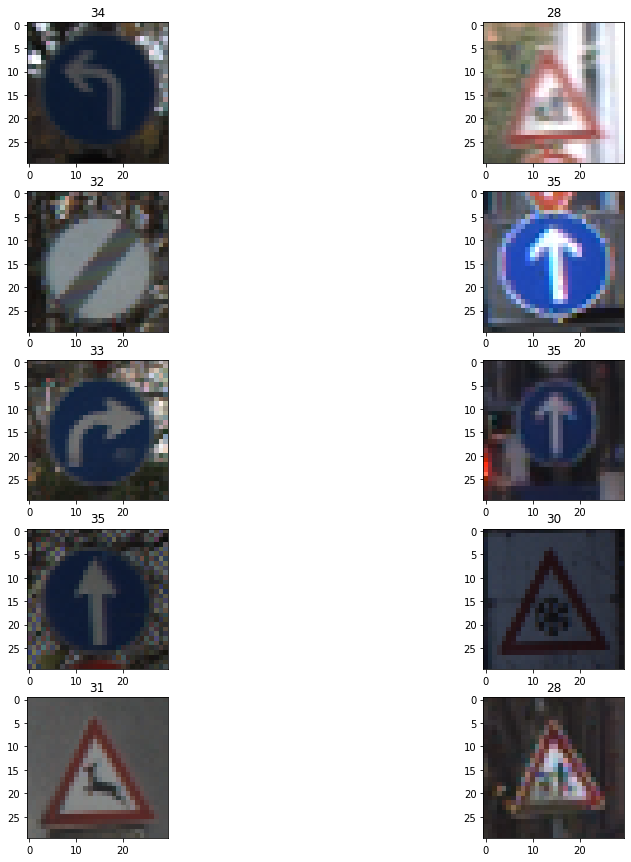

In [0]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
    plt.title(y_train[i-1])
plt.show()

In [0]:
def show_train_acc_history(trained, title=None):
    plt.plot(trained.history['accuracy'])
    plt.plot(trained.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'])
    if(title):
      plt.title(title)
    plt.show()

In [0]:
def show_train_loss_history(trained, title=None):
    plt.plot(trained.history['loss'])
    plt.plot(trained.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'])
    if(title):
      plt.title(title)
    plt.show()

# Data Preparation

In [0]:
ntrain, nx, ny, nz = x_train.shape
x_train_f = x_train.reshape((ntrain,nx*ny*nz))
ntest, nx, ny, nz = x_test.shape
x_test_f = x_test.reshape((ntest,nx*ny*nz))

data_scale = MinMaxScaler()
x_train_s = data_scale.fit_transform(x_train_f)
x_test_s = data_scale.transform(x_test_f)


x_train_3d = x_train_s.reshape((ntrain,nx,ny,nz))
x_test_3d = x_test_s.reshape((ntest,nx,ny,nz))

# CNN Network

In [0]:
sample_shape = x_train_3d[0].shape

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
start=time()
trained = model.fit(x_train_3d, to_categorical(y_train), epochs=25, shuffle=True, validation_split=0.2, batch_size=256)
train_time = time()-start
print("Training time:", train_time)

Epoch 1/25
123/123 [==============================] - 31s 249ms/step - loss: 2.5064 - accuracy: 0.3256 - val_loss: 4.4437 - val_accuracy: 0.0530
Epoch 2/25
123/123 [==============================] - 30s 241ms/step - loss: 0.7756 - accuracy: 0.7735 - val_loss: 2.4860 - val_accuracy: 0.2846
Epoch 3/25
123/123 [==============================] - 29s 239ms/step - loss: 0.3506 - accuracy: 0.8986 - val_loss: 1.9378 - val_accuracy: 0.4543
Epoch 4/25
123/123 [==============================] - 29s 240ms/step - loss: 0.1977 - accuracy: 0.9453 - val_loss: 1.4989 - val_accuracy: 0.5921
Epoch 5/25
123/123 [==============================] - 29s 239ms/step - loss: 0.1261 - accuracy: 0.9659 - val_loss: 1.2803 - val_accuracy: 0.6482
Epoch 6/25
123/123 [==============================] - 29s 237ms/step - loss: 0.0858 - accuracy: 0.9776 - val_loss: 1.2494 - val_accuracy: 0.6590
Epoch 7/25
123/123 [==============================] - 29s 232ms/step - loss: 0.0642 - accuracy: 0.9839 - val_loss: 0.9694 - val_ac

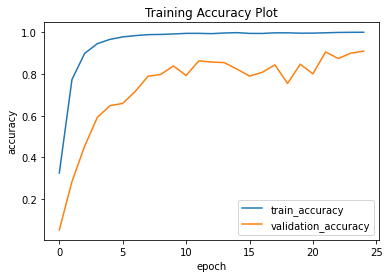

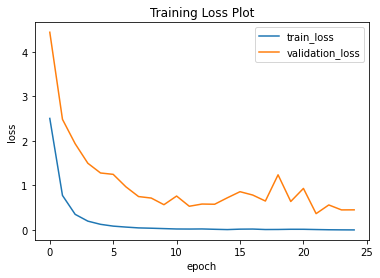

In [0]:
show_train_acc_history(trained, "Training Accuracy Plot")
show_train_loss_history(trained, "Training Loss Plot")

In [0]:
score = trained.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 4s 10ms/step - loss: 0.6022 - accuracy: 0.9199
Test score: [0.6021767258644104, 0.9198732972145081]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


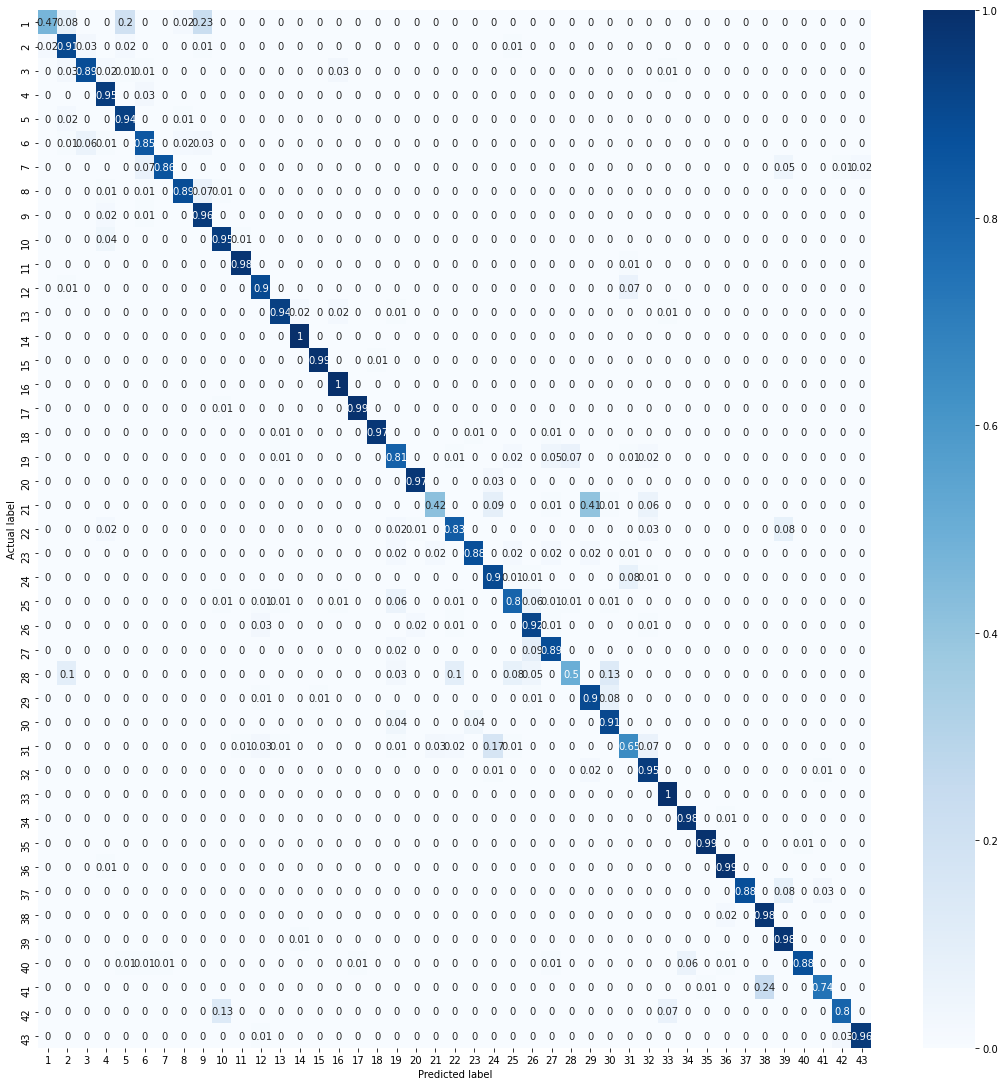

In [0]:
y_pred = trained.model.predict_classes(x_test_3d)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm, index = range(1,44), columns = range(1,44))

figure = plt.figure(figsize=(15, 15))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Activation Functions

## RELU

In [0]:
sample_shape = x_train_3d[0].shape

model_relu = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_relu = model_relu.fit(x_train_3d, to_categorical(y_train), epochs=15, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/15
123/123 [==============================] - 33s 266ms/step - loss: 2.5062 - accuracy: 0.3331 - val_loss: 3.7278 - val_accuracy: 0.1021
Epoch 2/15
123/123 [==============================] - 33s 265ms/step - loss: 0.8191 - accuracy: 0.7606 - val_loss: 2.9796 - val_accuracy: 0.2186
Epoch 3/15
123/123 [==============================] - 33s 269ms/step - loss: 0.3640 - accuracy: 0.8989 - val_loss: 1.9192 - val_accuracy: 0.4311
Epoch 4/15
123/123 [==============================] - 33s 266ms/step - loss: 0.2136 - accuracy: 0.9410 - val_loss: 1.5886 - val_accuracy: 0.5264
Epoch 5/15
123/123 [==============================] - 32s 263ms/step - loss: 0.1417 - accuracy: 0.9613 - val_loss: 1.7365 - val_accuracy: 0.5439
Epoch 6/15
123/123 [==============================] - 32s 260ms/step - loss: 0.0980 - accuracy: 0.9738 - val_loss: 1.0087 - val_accuracy: 0.7052
Epoch 7/15
123/123 [==============================] - 32s 260ms/step - loss: 0.0746 - accuracy: 0.9802 - val_loss: 1.0209 - val_ac

In [0]:
score = trained_relu.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 4s 11ms/step - loss: 0.5970 - accuracy: 0.8853
Test score: [0.5970236659049988, 0.8852731585502625]


## tanh

In [0]:
sample_shape = x_train_3d[0].shape

model_tanh = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh',kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_tanh.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_tanh = model_tanh.fit(x_train_3d, to_categorical(y_train), epochs=15, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/15
123/123 [==============================] - 32s 264ms/step - loss: 1.5996 - accuracy: 0.5682 - val_loss: 2.2615 - val_accuracy: 0.2993
Epoch 2/15
123/123 [==============================] - 32s 264ms/step - loss: 0.2817 - accuracy: 0.9287 - val_loss: 1.4215 - val_accuracy: 0.5634
Epoch 3/15
123/123 [==============================] - 32s 264ms/step - loss: 0.1177 - accuracy: 0.9730 - val_loss: 0.9705 - val_accuracy: 0.7021
Epoch 4/15
123/123 [==============================] - 32s 261ms/step - loss: 0.0626 - accuracy: 0.9872 - val_loss: 0.7033 - val_accuracy: 0.7590
Epoch 5/15
123/123 [==============================] - 32s 259ms/step - loss: 0.0399 - accuracy: 0.9917 - val_loss: 0.6497 - val_accuracy: 0.7809
Epoch 6/15
123/123 [==============================] - 31s 253ms/step - loss: 0.0243 - accuracy: 0.9954 - val_loss: 0.4508 - val_accuracy: 0.8493
Epoch 7/15
123/123 [==============================] - 31s 250ms/step - loss: 0.0162 - accuracy: 0.9975 - val_loss: 0.4433 - val_ac

In [0]:
score = trained_tanh.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 5s 12ms/step - loss: 0.3198 - accuracy: 0.9215
Test score: [0.3198452591896057, 0.9214568734169006]


## sigmoid

In [0]:
sample_shape = x_train_3d[0].shape

model_sigmoid = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='sigmoid', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='sigmoid', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='sigmoid', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='sigmoid', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_sigmoid.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_sigmoid = model_sigmoid.fit(x_train_3d, to_categorical(y_train), epochs=15, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/15
123/123 [==============================] - 36s 290ms/step - loss: 3.4717 - accuracy: 0.0669 - val_loss: 4.9204 - val_accuracy: 0.0000e+00
Epoch 2/15
123/123 [==============================] - 32s 262ms/step - loss: 3.4372 - accuracy: 0.0746 - val_loss: 4.8930 - val_accuracy: 0.0000e+00
Epoch 3/15
123/123 [==============================] - 32s 257ms/step - loss: 3.3262 - accuracy: 0.1019 - val_loss: 4.8568 - val_accuracy: 0.0000e+00
Epoch 4/15
123/123 [==============================] - 31s 255ms/step - loss: 2.7823 - accuracy: 0.2264 - val_loss: 4.5047 - val_accuracy: 0.0000e+00
Epoch 5/15
123/123 [==============================] - 31s 253ms/step - loss: 2.1112 - accuracy: 0.3938 - val_loss: 4.0336 - val_accuracy: 0.0000e+00
Epoch 6/15
123/123 [==============================] - 30s 245ms/step - loss: 1.6244 - accuracy: 0.5090 - val_loss: 3.7875 - val_accuracy: 0.0263
Epoch 7/15
123/123 [==============================] - 31s 249ms/step - loss: 1.3334 - accuracy: 0.5968 - val_l

In [0]:
score = trained_sigmoid.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 5s 12ms/step - loss: 1.0046 - accuracy: 0.7048
Test score: [1.0046119689941406, 0.7047505974769592]


## Visualizatoin

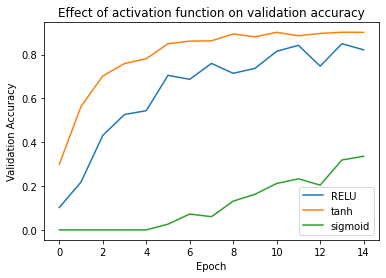

In [0]:
plt.plot(trained_relu.history['val_accuracy'])
plt.plot(trained_tanh.history['val_accuracy'])
plt.plot(trained_sigmoid.history['val_accuracy'])
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['RELU', 'tanh', 'sigmoid'])
plt.title('Effect of activation function on validation accuracy')
plt.show()

# Optimizers

## Adam

In [0]:
sample_shape = x_train_3d[0].shape

model_adam = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_adam = model_adam.fit(x_train_3d, to_categorical(y_train), epochs=15, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/15
123/123 [==============================] - 38s 305ms/step - loss: 1.6180 - accuracy: 0.5591 - val_loss: 2.4783 - val_accuracy: 0.3137
Epoch 2/15
123/123 [==============================] - 37s 305ms/step - loss: 0.2708 - accuracy: 0.9305 - val_loss: 1.5377 - val_accuracy: 0.5488
Epoch 3/15
123/123 [==============================] - 40s 325ms/step - loss: 0.1045 - accuracy: 0.9757 - val_loss: 0.9354 - val_accuracy: 0.6924
Epoch 4/15
123/123 [==============================] - 37s 303ms/step - loss: 0.0537 - accuracy: 0.9890 - val_loss: 0.6551 - val_accuracy: 0.7874
Epoch 5/15
123/123 [==============================] - 37s 303ms/step - loss: 0.0317 - accuracy: 0.9942 - val_loss: 0.5901 - val_accuracy: 0.8099
Epoch 6/15
123/123 [==============================] - 37s 304ms/step - loss: 0.0193 - accuracy: 0.9974 - val_loss: 0.5652 - val_accuracy: 0.8199
Epoch 7/15
123/123 [==============================] - 37s 304ms/step - loss: 0.0124 - accuracy: 0.9986 - val_loss: 0.4496 - val_ac

In [0]:
score = trained_adam.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 5s 13ms/step - loss: 0.3064 - accuracy: 0.9228
Test score: [0.30640462040901184, 0.9228028655052185]


## Gradient Descent

In [0]:
sample_shape = x_train_3d[0].shape

model_sgd = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])


opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model_sgd.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
trained_sgd = model_sgd.fit(x_train_3d, to_categorical(y_train), epochs=15, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/15
123/123 [==============================] - 34s 277ms/step - loss: 2.9055 - accuracy: 0.2442 - val_loss: 3.9497 - val_accuracy: 3.8256e-04
Epoch 2/15
123/123 [==============================] - 34s 276ms/step - loss: 1.2816 - accuracy: 0.6469 - val_loss: 3.2345 - val_accuracy: 0.0673
Epoch 3/15
123/123 [==============================] - 34s 276ms/step - loss: 0.6591 - accuracy: 0.8254 - val_loss: 2.2926 - val_accuracy: 0.3091
Epoch 4/15
123/123 [==============================] - 34s 277ms/step - loss: 0.3906 - accuracy: 0.9113 - val_loss: 2.3228 - val_accuracy: 0.3536
Epoch 5/15
123/123 [==============================] - 34s 275ms/step - loss: 0.2553 - accuracy: 0.9483 - val_loss: 1.8852 - val_accuracy: 0.4616
Epoch 6/15
123/123 [==============================] - 34s 274ms/step - loss: 0.1837 - accuracy: 0.9655 - val_loss: 1.6968 - val_accuracy: 0.5103
Epoch 7/15
123/123 [==============================] - 34s 274ms/step - loss: 0.1413 - accuracy: 0.9736 - val_loss: 1.7723 - va

In [0]:
score = trained_sgd.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 5s 12ms/step - loss: 0.4055 - accuracy: 0.8961
Test score: [0.4054931402206421, 0.8961203694343567]


## SGD with momentum and decading learning rate

In [0]:
sample_shape = x_train_3d[0].shape

model_sgd_moment = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])


opt = tf.keras.optimizers.SGD(learning_rate=0.1 , decay=0.01, momentum=0.9)

model_sgd_moment.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [0]:
trained_sgd_moment = model_sgd_moment.fit(x_train_3d, to_categorical(y_train), epochs=15, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/15
123/123 [==============================] - 34s 275ms/step - loss: 1.5322 - accuracy: 0.5936 - val_loss: 1.8724 - val_accuracy: 0.4814
Epoch 2/15
123/123 [==============================] - 34s 276ms/step - loss: 0.1556 - accuracy: 0.9656 - val_loss: 1.3030 - val_accuracy: 0.6349
Epoch 3/15
123/123 [==============================] - 36s 296ms/step - loss: 0.0801 - accuracy: 0.9845 - val_loss: 1.0574 - val_accuracy: 0.7007
Epoch 4/15
123/123 [==============================] - 34s 278ms/step - loss: 0.0563 - accuracy: 0.9895 - val_loss: 0.8887 - val_accuracy: 0.7448
Epoch 5/15
123/123 [==============================] - 34s 276ms/step - loss: 0.0446 - accuracy: 0.9935 - val_loss: 0.8168 - val_accuracy: 0.7598
Epoch 6/15
123/123 [==============================] - 34s 276ms/step - loss: 0.0371 - accuracy: 0.9949 - val_loss: 0.7872 - val_accuracy: 0.7661
Epoch 7/15
123/123 [==============================] - 34s 277ms/step - loss: 0.0326 - accuracy: 0.9958 - val_loss: 0.6639 - val_ac

In [0]:
score = trained_sgd_moment.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 5s 12ms/step - loss: 0.3296 - accuracy: 0.9062
Test score: [0.32955202460289, 0.9061757922172546]


## visualization

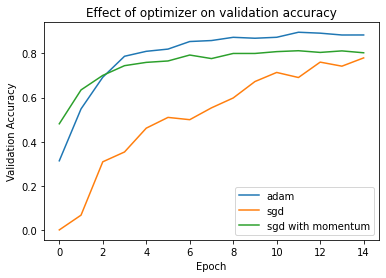

In [0]:
plt.plot(trained_adam.history['val_accuracy'])
plt.plot(trained_sgd.history['val_accuracy'])
plt.plot(trained_sgd_moment.history['val_accuracy'])
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['adam', 'sgd', 'sgd with momentum'])
plt.title('Effect of optimizer on validation accuracy')
plt.show()

# Dropout

## Without Dropout

In [0]:
sample_shape = x_train_3d[0].shape

model_withoutDropout = Sequential([
    Conv2D(64, kernel_size=(4), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(4), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(64, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

# opt = tf.keras.optimizers.SGD(learning_rate=0.1)
opt = 'adam'

model_withoutDropout.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

In [0]:
trained_withoutDropout = model_withoutDropout.fit(x_train_3d, to_categorical(y_train), epochs=100, shuffle=True, validation_split=0.2, batch_size=64)

Epoch 1/100
491/491 [==============================] - 3s 5ms/step - loss: 2.3882 - accuracy: 0.3201 - val_loss: 4.2951 - val_accuracy: 0.0171
Epoch 2/100
491/491 [==============================] - 2s 5ms/step - loss: 0.8835 - accuracy: 0.7240 - val_loss: 2.9318 - val_accuracy: 0.2201
Epoch 3/100
491/491 [==============================] - 2s 5ms/step - loss: 0.4405 - accuracy: 0.8684 - val_loss: 2.3669 - val_accuracy: 0.3420
Epoch 4/100
491/491 [==============================] - 2s 5ms/step - loss: 0.2749 - accuracy: 0.9191 - val_loss: 1.5743 - val_accuracy: 0.5467
Epoch 5/100
491/491 [==============================] - 2s 5ms/step - loss: 0.1874 - accuracy: 0.9452 - val_loss: 1.0870 - val_accuracy: 0.6923
Epoch 6/100
491/491 [==============================] - 2s 5ms/step - loss: 0.1425 - accuracy: 0.9590 - val_loss: 1.3670 - val_accuracy: 0.6132
Epoch 7/100
491/491 [==============================] - 2s 5ms/step - loss: 0.1143 - accuracy: 0.9652 - val_loss: 1.7457 - val_accuracy: 0.5462

In [0]:
score = trained_withoutDropout.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 1s 2ms/step - loss: 0.8573 - accuracy: 0.9320
Test score: [0.8573258519172668, 0.9319873452186584]


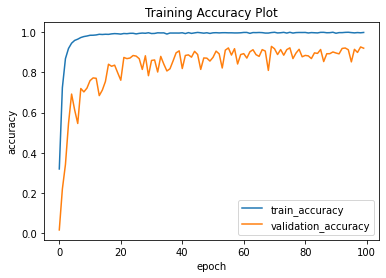

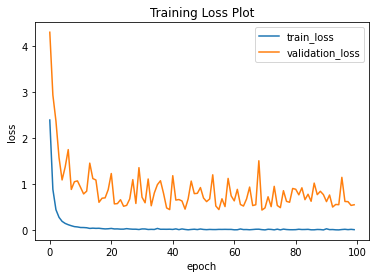

In [0]:
show_train_acc_history(trained_withoutDropout, "Training Accuracy Plot")
show_train_loss_history(trained_withoutDropout, "Training Loss Plot")

## With Dropout

In [0]:
sample_shape = x_train_3d[0].shape

model_withDropout = Sequential([
    Conv2D(64, kernel_size=(4), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(4), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    Dropout(0.1, seed=5),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    # Dropout(0.1),
    Dense(128, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(64, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dropout(0.2, seed=5),
    Dense(43, activation='softmax')
])

# opt = tf.keras.optimizers.SGD(learning_rate=0.1)
opt = 'adam'

model_withDropout.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

In [25]:
trained_withDropout = model_withDropout.fit(x_train_3d, to_categorical(y_train), epochs=100, shuffle=True, validation_split=0.2, batch_size=64)

Epoch 1/100
491/491 [==============================] - 3s 5ms/step - loss: 2.6548 - accuracy: 0.2631 - val_loss: 3.7235 - val_accuracy: 0.0027
Epoch 2/100
491/491 [==============================] - 2s 5ms/step - loss: 1.2698 - accuracy: 0.5954 - val_loss: 3.0332 - val_accuracy: 0.1636
Epoch 3/100
491/491 [==============================] - 2s 5ms/step - loss: 0.6553 - accuracy: 0.7926 - val_loss: 2.3887 - val_accuracy: 0.2946
Epoch 4/100
491/491 [==============================] - 2s 5ms/step - loss: 0.4125 - accuracy: 0.8723 - val_loss: 2.2675 - val_accuracy: 0.3535
Epoch 5/100
491/491 [==============================] - 2s 5ms/step - loss: 0.2964 - accuracy: 0.9089 - val_loss: 1.8055 - val_accuracy: 0.4426
Epoch 6/100
491/491 [==============================] - 2s 5ms/step - loss: 0.2233 - accuracy: 0.9339 - val_loss: 1.4158 - val_accuracy: 0.5499
Epoch 7/100
491/491 [==============================] - 2s 5ms/step - loss: 0.1832 - accuracy: 0.9464 - val_loss: 1.3305 - val_accuracy: 0.6034

In [26]:
score = trained_withDropout.model.evaluate(x_test_3d, to_categorical(y_test))
print("Test score:", score)

395/395 [==============================] - 1s 2ms/step - loss: 0.5797 - accuracy: 0.9435
Test score: [0.5796545743942261, 0.943467915058136]


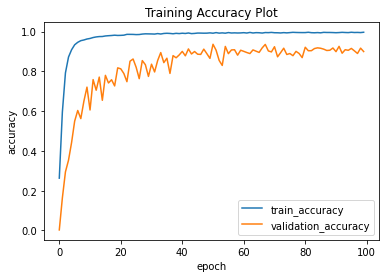

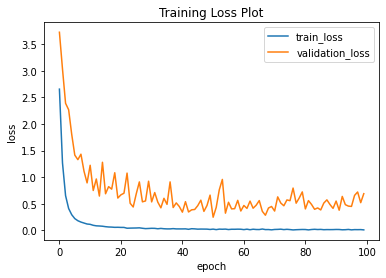

In [27]:
show_train_acc_history(trained_withDropout, "Training Accuracy Plot")
show_train_loss_history(trained_withDropout, "Training Loss Plot")

## Visualization

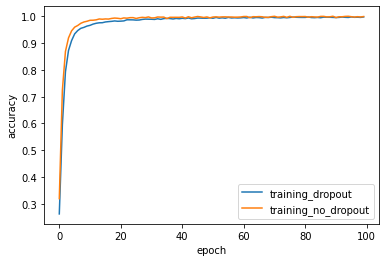

In [28]:
plt.plot(trained_withDropout.history['accuracy'])
plt.plot(trained_withoutDropout.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_dropout', 'training_no_dropout'])
plt.show()

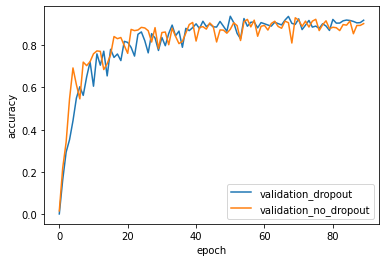

In [32]:
plt.plot(trained_withDropout.history['val_accuracy'][:90])
plt.plot(trained_withoutDropout.history['val_accuracy'][:90])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation_dropout', 'validation_no_dropout'])
plt.show()

# Data Augmentation

## With Data Augmentation

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(x_train_3d)

In [0]:
sample_shape = x_train_3d[0].shape

model_withAugmentation = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(128, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_withAugmentation.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_withAugmentation = model_withAugmentation.fit_generator(datagen.flow(x_train_3d, to_categorical(y_train), batch_size=256), epochs=70,
                                                              steps_per_epoch=len(x_train_3d)//256, shuffle=True, 
                                                              validation_data=(x_test_3d, to_categorical(y_test)))

Epoch 1/70
153/153 [==============================] - 16s 103ms/step - loss: 2.8853 - accuracy: 0.2114 - val_loss: 1.9923 - val_accuracy: 0.3907
Epoch 2/70
153/153 [==============================] - 16s 103ms/step - loss: 1.5469 - accuracy: 0.5136 - val_loss: 1.2574 - val_accuracy: 0.6082
Epoch 3/70
153/153 [==============================] - 16s 104ms/step - loss: 1.0204 - accuracy: 0.6742 - val_loss: 0.9217 - val_accuracy: 0.7265
Epoch 4/70
153/153 [==============================] - 15s 101ms/step - loss: 0.7222 - accuracy: 0.7742 - val_loss: 0.7029 - val_accuracy: 0.7998
Epoch 5/70
153/153 [==============================] - 16s 103ms/step - loss: 0.5614 - accuracy: 0.8259 - val_loss: 0.6562 - val_accuracy: 0.8193
Epoch 6/70
153/153 [==============================] - 15s 101ms/step - loss: 0.4549 - accuracy: 0.8592 - val_loss: 0.6169 - val_accuracy: 0.8140
Epoch 7/70
153/153 [==============================] - 16s 102ms/step - loss: 0.4032 - accuracy: 0.8753 - val_loss: 0.5420 - val_ac

## Without Data Augmentation

In [0]:
sample_shape = x_train_3d[0].shape

model_withoutAugmentation = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(128, activation='relu', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_withoutAugmentation.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_withoutAugmentation = model_withoutAugmentation.fit(x_train_3d, to_categorical(y_train), batch_size=256, epochs=70, 
                                                            shuffle=True,  validation_data=(x_test_3d, to_categorical(y_test)))

Epoch 1/70
154/154 [==============================] - 4s 25ms/step - loss: 2.5867 - accuracy: 0.2910 - val_loss: 1.5559 - val_accuracy: 0.5517
Epoch 2/70
154/154 [==============================] - 4s 24ms/step - loss: 0.8138 - accuracy: 0.7572 - val_loss: 0.9242 - val_accuracy: 0.7497
Epoch 3/70
154/154 [==============================] - 4s 24ms/step - loss: 0.3778 - accuracy: 0.8919 - val_loss: 0.6318 - val_accuracy: 0.8421
Epoch 4/70
154/154 [==============================] - 4s 24ms/step - loss: 0.2253 - accuracy: 0.9364 - val_loss: 0.5249 - val_accuracy: 0.8705
Epoch 5/70
154/154 [==============================] - 4s 24ms/step - loss: 0.1534 - accuracy: 0.9593 - val_loss: 0.4977 - val_accuracy: 0.8847
Epoch 6/70
154/154 [==============================] - 4s 24ms/step - loss: 0.1213 - accuracy: 0.9666 - val_loss: 0.4726 - val_accuracy: 0.8905
Epoch 7/70
154/154 [==============================] - 4s 24ms/step - loss: 0.0876 - accuracy: 0.9774 - val_loss: 0.4583 - val_accuracy: 0.8988

## Visualization

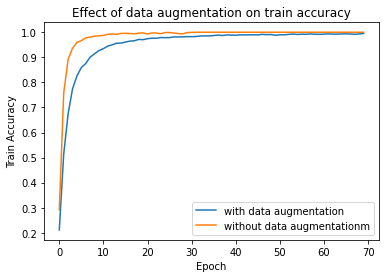

In [0]:
plt.plot(trained_withAugmentation.history['accuracy'])
plt.plot(trained_withoutAugmentation.history['accuracy'])
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.legend(['with data augmentation', 'without data augmentationm'])
plt.title('Effect of data augmentation on train accuracy')
plt.show()

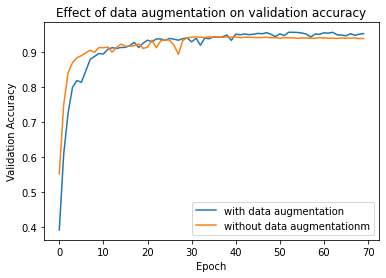

In [0]:
plt.plot(trained_withAugmentation.history['val_accuracy'])
plt.plot(trained_withoutAugmentation.history['val_accuracy'])
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['with data augmentation', 'without data augmentationm'])
plt.title('Effect of data augmentation on validation accuracy')
plt.show()

# Batch Normalization

## Without Batch Normalizarion

In [0]:
sample_shape = x_train_3d[0].shape

model_wobatchNormalization = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(256, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    Dense(43, activation='softmax')
])

model_wobatchNormalization.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_wobatchNormalization = model_wobatchNormalization.fit(x_train_3d, to_categorical(y_train), epochs=50, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/50
123/123 [==============================] - 3s 25ms/step - loss: 1.4885 - accuracy: 0.5970 - val_loss: 2.5260 - val_accuracy: 0.3068
Epoch 2/50
123/123 [==============================] - 2s 18ms/step - loss: 0.2413 - accuracy: 0.9400 - val_loss: 1.2623 - val_accuracy: 0.5812
Epoch 3/50
123/123 [==============================] - 2s 18ms/step - loss: 0.0993 - accuracy: 0.9784 - val_loss: 0.8200 - val_accuracy: 0.7358
Epoch 4/50
123/123 [==============================] - 2s 19ms/step - loss: 0.0542 - accuracy: 0.9886 - val_loss: 0.7802 - val_accuracy: 0.7387
Epoch 5/50
123/123 [==============================] - 2s 20ms/step - loss: 0.0342 - accuracy: 0.9936 - val_loss: 0.5561 - val_accuracy: 0.8148
Epoch 6/50
123/123 [==============================] - 2s 18ms/step - loss: 0.0204 - accuracy: 0.9966 - val_loss: 0.5333 - val_accuracy: 0.8301
Epoch 7/50
123/123 [==============================] - 2s 18ms/step - loss: 0.0126 - accuracy: 0.9984 - val_loss: 0.5162 - val_accuracy: 0.8430

## With Batch Normalization

In [0]:
sample_shape = x_train_3d[0].shape

model_batchNormalization2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True, input_shape=sample_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='tanh', kernel_initializer=RandomNormal(seed=5), use_bias=True),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    
    Dense(256, activation='tanh', kernel_initializer=RandomNormal(seed=5)),
    
    Dense(43, activation='softmax')
])

model_batchNormalization2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
trained_batchNormalization2 = model_batchNormalization2.fit(x_train_3d, to_categorical(y_train), epochs=50, shuffle=True, validation_split=0.2, batch_size=256)

Epoch 1/50
123/123 [==============================] - 3s 27ms/step - loss: 0.7140 - accuracy: 0.8207 - val_loss: 2.9534 - val_accuracy: 0.1849
Epoch 2/50
123/123 [==============================] - 3s 21ms/step - loss: 0.0672 - accuracy: 0.9867 - val_loss: 1.7078 - val_accuracy: 0.4748
Epoch 3/50
123/123 [==============================] - 3s 22ms/step - loss: 0.0224 - accuracy: 0.9967 - val_loss: 0.7541 - val_accuracy: 0.7618
Epoch 4/50
123/123 [==============================] - 3s 21ms/step - loss: 0.0104 - accuracy: 0.9990 - val_loss: 0.4565 - val_accuracy: 0.8576
Epoch 5/50
123/123 [==============================] - 3s 22ms/step - loss: 0.0044 - accuracy: 0.9997 - val_loss: 0.3803 - val_accuracy: 0.8786
Epoch 6/50
123/123 [==============================] - 3s 23ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.3941 - val_accuracy: 0.8708
Epoch 7/50
123/123 [==============================] - 3s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4007 - val_accuracy: 0.8761

## Visualization

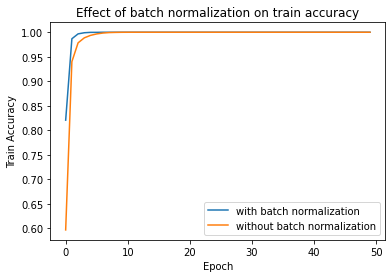

In [0]:
plt.plot(trained_batchNormalization2.history['accuracy'])
plt.plot(trained_wobatchNormalization.history['accuracy'])
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.legend(['with batch normalization', 'without batch normalization'])
plt.title('Effect of batch normalization on train accuracy')
plt.show()

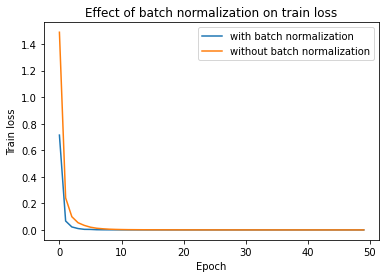

In [0]:
plt.plot(trained_batchNormalization2.history['loss'])
plt.plot(trained_wobatchNormalization.history['loss'])
plt.ylabel('Train loss')
plt.xlabel('Epoch')
plt.legend(['with batch normalization', 'without batch normalization'])
plt.title('Effect of batch normalization on train loss')
plt.show()

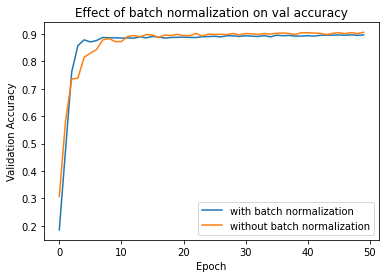

In [0]:
plt.plot(trained_batchNormalization2.history['val_accuracy'])
plt.plot(trained_wobatchNormalization.history['val_accuracy'])
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['with batch normalization', 'without batch normalization'])
plt.title('Effect of batch normalization on val accuracy')
plt.show()

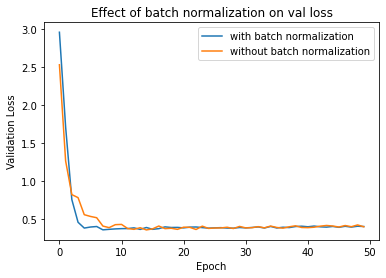

In [0]:
plt.plot(trained_batchNormalization2.history['val_loss'])
plt.plot(trained_wobatchNormalization.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['with batch normalization', 'without batch normalization'])
plt.title('Effect of batch normalization on val loss')
plt.show()